# Boston Housing Project

Author: Anja Thiede <anja.thiede@bayer.com>

Start Date: 18.12.2023

# Import libraries

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats
import statsmodels.api as sm

# Load the data

In [43]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

First look at the data

In [44]:
display(boston_df)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


In [45]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

# Visualizations

## For the "Median value of owner-occupied homes" provide a boxplot

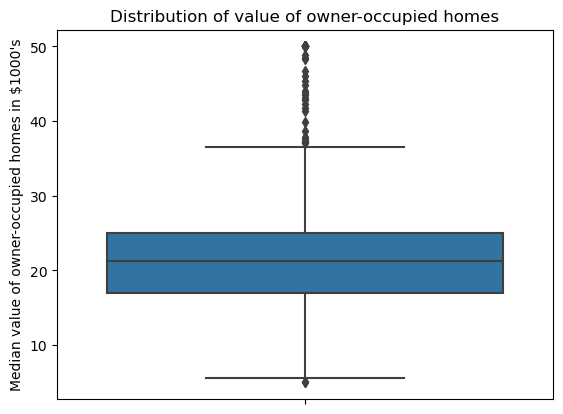

In [46]:
ax = sns.boxplot(y='MEDV', data=boston_df)
ax.set(ylabel="Median value of owner-occupied homes in $1000's")
ax.set_title('Distribution of value of owner-occupied homes')
plt.show()

The distribution of median values of owner-occupied homes has a mean of around 22000 Dollars, with an interquartile range between approx. 4000 and 37000 Dollars. The maximum value of this data is at 50000 Dollars.

## Provide a  bar plot for the Charles river variable



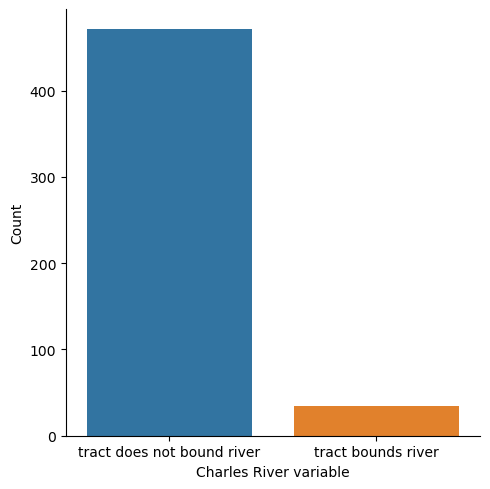

In [47]:
ax = sns.catplot(x='CHAS', kind='count', data=boston_df)
ax.set(ylabel='Count', xlabel='Charles River variable', xticklabels=['tract does not bound river', 'tract bounds river'])
plt.show()

While close to 500 properties are not bound by the Charles River, only approximately 40 tracts bound the Charles River.

## Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)


- First step, create age group variable

In [48]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

- Second step, visualize Boxplot

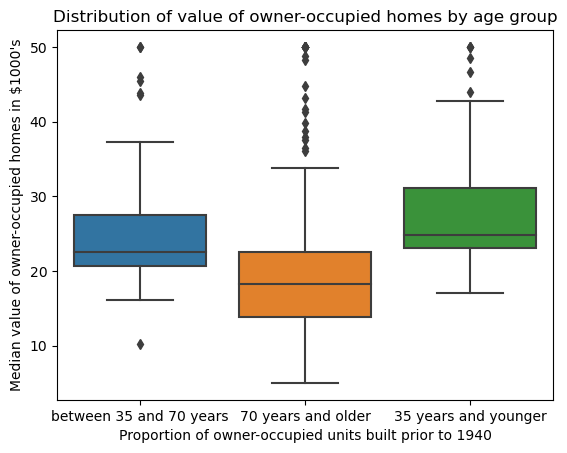

In [49]:
ax = sns.boxplot(x='age_group', y='MEDV', data=boston_df)
ax.set(ylabel="Median value of owner-occupied homes in $1000's", xlabel='Proportion of owner-occupied units built prior to 1940')
ax.set_title('Distribution of value of owner-occupied homes by age group')
plt.show()

While in all three age groups the median value of owner-occupied homes reaches a maximum of 50000 Dollars, the mean value for the units 70 years and older is lowest, followed by the mean value of units that are between 35 and 70 years old, and the youngest units with 35 years or less of age having the highest mean value.


## Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?



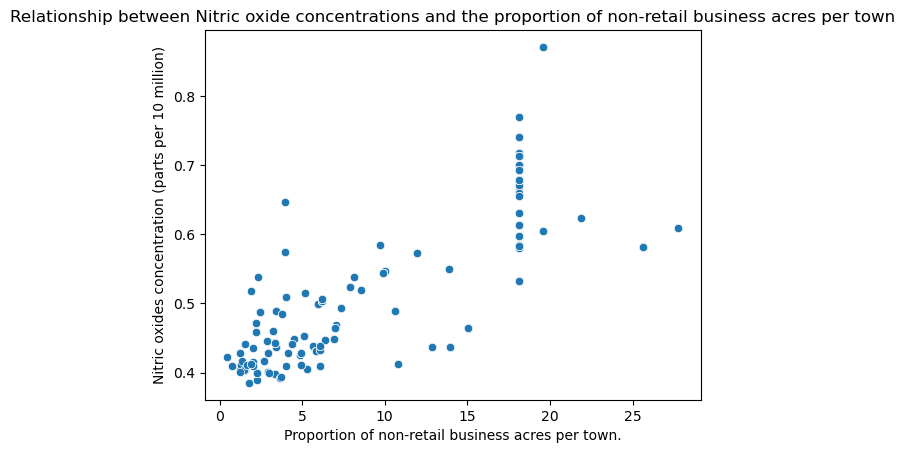

In [50]:
ax = sns.scatterplot(x="INDUS", y="NOX", data=boston_df)
ax.set(ylabel="Nitric oxides concentration (parts per 10 million)", xlabel='Proportion of non-retail business acres per town.')
ax.set_title('Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town')
plt.show()

For the lower values for both variables, there seems to be a relationship between nitric oxide concentrations and the proportion of non-retail business acres per town, in the sense that the more non-retail business acres per town exist, the higher the nitric oxide concentration is. Interestingly, for a proportion of approximately 18 non-retail business acres per town, severeal different nitric oxide concentrations have been measured, ranging from approx. 0.52 to 0.78.

## Create a histogram for the pupil to teacher ratio variable

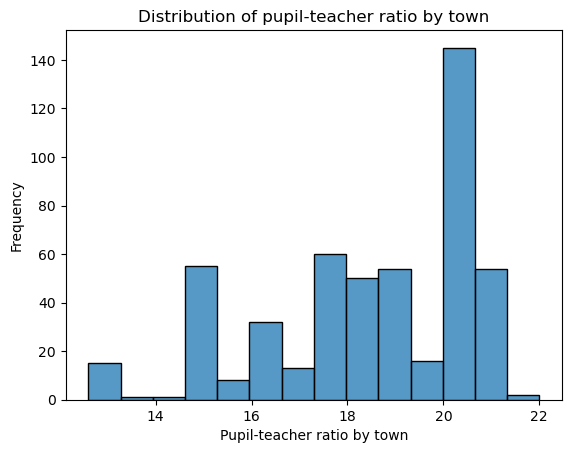

In [51]:
ax = sns.histplot(boston_df['PTRATIO'])
ax.set(xlabel='Pupil-teacher ratio by town', ylabel='Frequency')
ax.set_title('Distribution of pupil-teacher ratio by town')
plt.show()

The distribution of pupil-teacher ratio by town seems to be relatively normally distributed with an exception of one peak value at a ratio of around 20-21.

# Statistical Testing

## Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Hypotheses: We are working with a null hypothesis that there is no difference in median values of houses bounded by the Charles river vs. not bounded by the Charles river. The alternative hypothesis states that there is a difference in the median value of houses bounded by the Charles river vs. not bounded by the Charles river.

Let's first check whether all assumptions for independent t-test are met.

The dependent variable (median value of houses) should be normally distributed.

C:\Users\gmlwf\AppData\Local\Temp\ipykernel_24724\642231339.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(boston_df['MEDV'],


[Text(0.5, 0, 'Normal Distribution'), Text(0, 0.5, 'Frequency')]

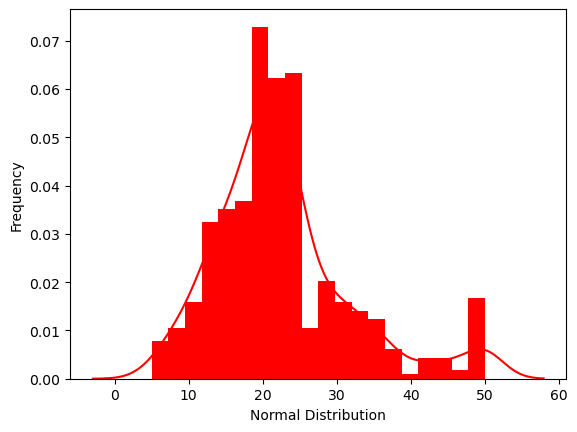

In [52]:
ax = sns.distplot(boston_df['MEDV'],
                  bins=20,
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')


Looking at the histogram, we can assume that the dependent variable is normally distributed.

Assumption of homogeneity of variance

In [53]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0.0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1.0]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

According to Levene's Test the p-value is less than 0.05 which means we cannot assume equality of variances and should therefore not continue with an independent-samples T-test. A Welch T-test as a non-parametric alternative could be used instead. We can use the Welch T-test by using the option of "equal_var" = False.

In [54]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0.0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1.0]['MEDV'], equal_var = False)


Ttest_indResult(statistic=-3.113291312794837, pvalue=0.003567170098137517)

Conclusion: Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in median value of houses bounded by the Charles river vs. not bounded by the Charles river.

## Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Hypotheses: We are working with a null hypothesis that there is no difference in the means of median values of houses depending on age group/proportion. The alternative hypothesis states that at least of of the means differs.

Let's again check whether the assumptions for using ANOVA are met.

Assumption of homogeneity of variances.

In [55]:
scipy.stats.levene(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['age_group'] == '70 years and older']['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

As the p-value of Levene's test is greather than 0.05, we can assume that the variances are equal and we can proceed with the ANOVA.

First, separate the three samples (one for each age category) into a variable each.

In [56]:
youngest = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
medium = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
oldest = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

Now, we can run a one-way ANOVA.

In [57]:
f_statistic, p_value = scipy.stats.f_oneway(youngest, medium, oldest)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


Conclusion: Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.

## Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

Hypothesis: The null hypothesis states that the nitroc oxide concentrations are not correlated with the proportion of non-retail business acres per town. The alternative hypothesis states that the nitroc oxide concentrations are correlated with the proportion of non-retail business acres per town.

Assumptions for Pearson correlation are met as both variables are continuous.

In [58]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209149, pvalue=7.913361061242812e-98)

Conclusion: Since the p-value  (Sig. (2-tailed))  < 0.05, we reject the Null hypothesis and conclude that there exists a relationship between nitroc oxide concentrations and the proportion of non-retail business acres per town.


## What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Hypothesis: The null hypothesis states that the weighted distance to the five Boston employment centres has no effect on the median value of owner-occupied homes. The alternative hypothesis states that the weighted distance to the five Boston employment centres has an effect on the median value of owner-occupied homes.

In [59]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 21 Dec 2023   Prob (F-statistic):           1.21e-08
Time:                        10:33:45   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Conclusion: As p < 0.05 there is evidence of correlation between the weighted distance to the five Boston employment centres and the median value of owner-occupied homes. The R-squared value lets us conclude a weak correlation between the two variables.